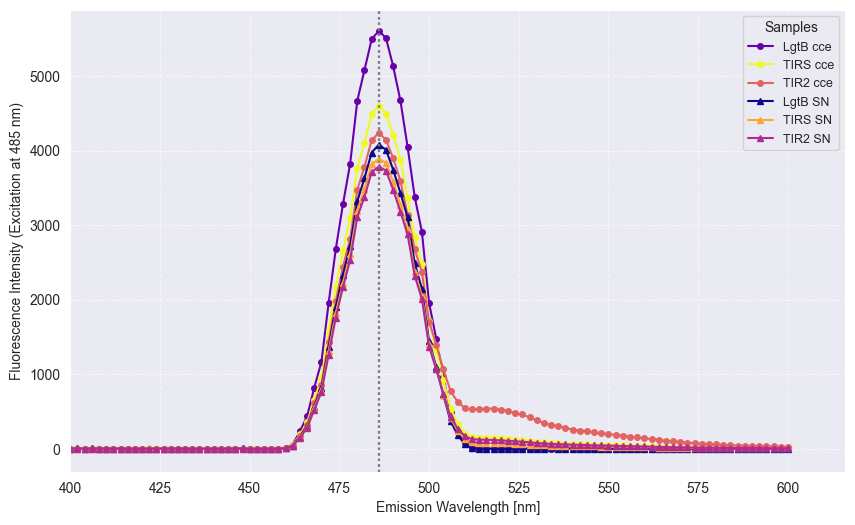

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define file path
excel_file = r'C:\Users\Lenovo\Documents\BT Studies\MASTER PROJECT\Tecan_17.03.25_emission.xlsx'

# Emission Wavelengths from row 2 (C2:FG2)
wavelengths = pd.read_excel(excel_file, sheet_name=0, header=None, usecols="C:FG", skiprows=1, nrows=1)
wavelengths = wavelengths.iloc[0].dropna().values
wavelengths = np.array(wavelengths, dtype=float)

# Read fluorescence data starting from row 3
df = pd.read_excel(excel_file, sheet_name=0, header=None, usecols="B:FG", skiprows=2)

# Set the first column as 'Sample' names
df.columns = ['Sample'] + list(wavelengths)
df['Sample'] = df['Sample'].astype(str)

# Remove any rows where all fluorescence values are NaN
df = df.dropna(how='all')

# Remove unwanted rows
df = df[~df['Sample'].str.contains("Wavel", na=False)]
df = df.dropna()

# Ensure the fluorescence data is numeric
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Find unique sample names
unique_samples = sorted(set(df['Sample']))

# olor palette
colors = plt.cm.plasma(np.linspace(0, 1, len(unique_samples)))
color_map = {sample: color for sample, color in zip(unique_samples, colors)}

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# triangle markers for B6, B7, B8 (i.e., rows C6-FG6, C7-FG7, C8-FG8)
triangle_samples = {"LgtB SN", "TIRS SN", "TIR2 SN"}

# Store peak emission wavelengths
peaks = {}

# Plot the data for each sample
for row_idx, row in df.iterrows():
    sample_name = row['Sample']
    values = row[1:].values  # Values from C to FG columns
    linestyle = "-"  # Default line style
    marker = "o"  # Default marker (circle)

    # Check if the sample is B6, B7, or B8 and set triangle marker
    if sample_name in triangle_samples:
        marker = "^"  # Set marker to triangle for B6, B7, B8

    # Find the highest emission intensity (Peak)
    peak_idx = np.argmax(values)  # Index of the highest intensity
    peak_x = wavelengths[peak_idx]  # Corresponding emission wavelength
    peaks[sample_name] = peak_x  # Store the peak value

    # Plot fluorescence emission data with correct markers
    ax.plot(wavelengths, values, label=sample_name, color=color_map.get(sample_name, 'black'),
            linestyle=linestyle, markersize=4, marker=marker)  # Marker size and type

    # Draw vertical line at peak emission wavelength
    ax.axvline(x=peak_x, linestyle=":", color="gray", alpha=0.7)

# labels & title for emission scan
ax.set_xlabel("Emission Wavelength [nm]")
ax.set_ylabel("Fluorescence Intensity (Excitation at 485 nm)")

# Set X-axis limits to start from 400 nm
ax.set_xlim(left=400)

# Legend & Grid
ax.legend(title="Samples", fontsize=9)
ax.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.show()